In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

import pandas
import numpy
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.graphics.gofplots as gofplots
import statsmodels.formula.api as sm
import datetime

COLOR_REP = '#E24A33'
COLOR_DEM = '#348ABD'
COLOR_ALT = '#777777'

In [3]:
data = pandas.read_csv('all_data.csv', index_col='date', parse_dates=True)

In [4]:
data

,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,fed_sur,fed_rec,fed_out,def_pct_gdp,cpi_inflation,gdp_r_growth,gdp_n_growth,fed_sur_pct_gdp
date,,,,,,,,,,,,,,,,,,
1930-01-01,0,96,39,56,435,163,267,966.7,92.2,17.100,738.0,4058.0,3320.0,1.2,0.000000,-0.085084,-0.118547,8.004338
1931-01-01,0,96,39,56,435,163,267,904.8,77.4,15.900,-462.0,3116.0,3577.0,1.4,-0.070175,-0.064032,-0.160521,-5.968992
1932-01-01,0,96,47,48,435,217,217,788.2,59.5,14.300,-2735.0,1924.0,4659.0,1.7,-0.100629,-0.128868,-0.231266,-45.966387
1933-01-01,1,96,47,48,435,217,217,778.3,57.2,12.900,-2602.0,1997.0,4598.0,1.7,-0.097902,-0.012560,-0.038655,-45.489510
1934-01-01,1,96,59,36,435,313,117,862.2,66.8,13.200,-3586.0,2955.0,6541.0,1.4,0.023256,0.107799,0.167832,-53.682635
1935-01-01,1,96,59,36,435,313,117,939.0,74.3,13.600,-2803.0,3609.0,6412.0,1.6,0.030303,0.089074,0.112275,-37.725437
1936-01-01,1,96,69,25,435,322,103,1060.5,84.9,13.800,-4304.0,3923.0,8228.0,1.6,0.014706,0.129393,0.142665,-50.694935
1937-01-01,1,96,69,25,435,322,103,1114.6,93.0,14.100,-2193.0,5387.0,7580.0,1.5,0.021739,0.051014,0.095406,-23.580645
1938-01-01,1,96,75,17,435,333,89,1077.7,87.4,14.200,-89.0,6751.0,6840.0,1.7,0.007092,-0.033106,-0.060215,-1.018307


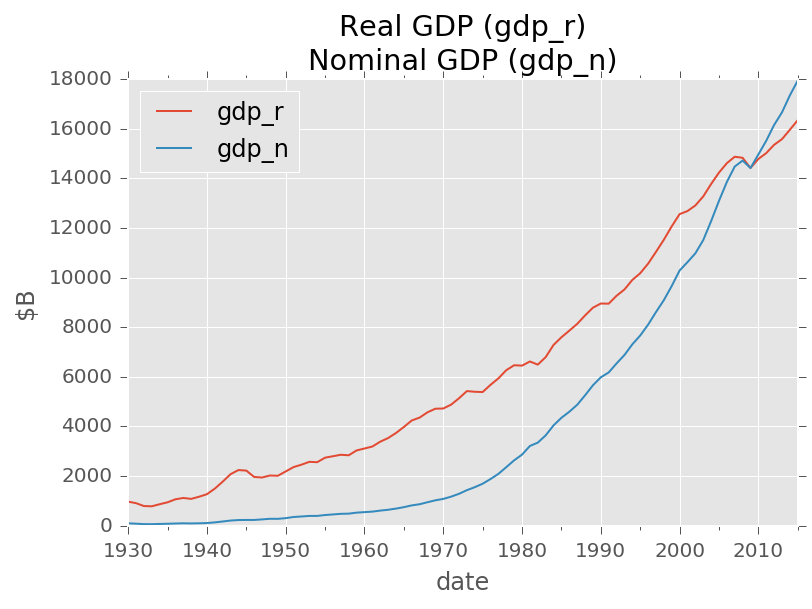

In [5]:
data[['gdp_r', 'gdp_n']].plot()
plt.title('Real GDP (gdp_r)\nNominal GDP (gdp_n)')
plt.ylabel('$B')
plt.show()

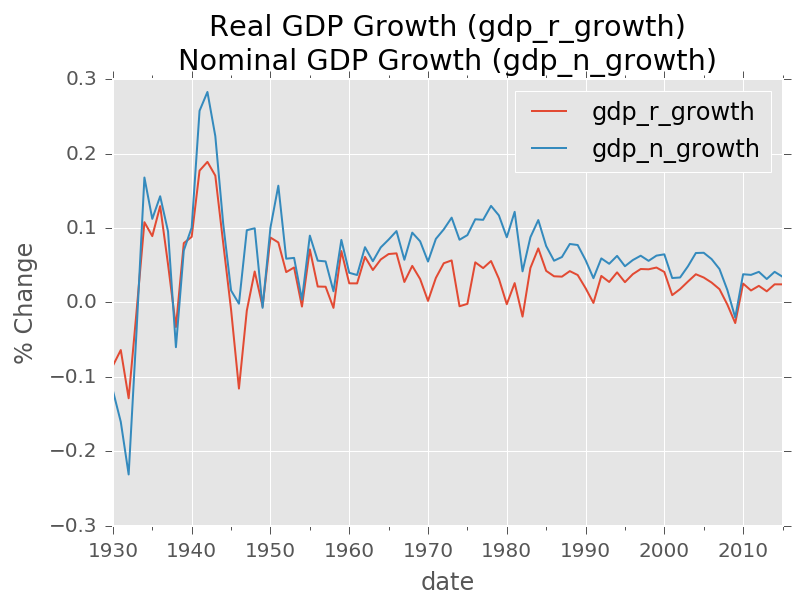

In [6]:
data[['gdp_r_growth', 'gdp_n_growth']].plot()
plt.title('Real GDP Growth (gdp_r_growth)\nNominal GDP Growth (gdp_n_growth)')
plt.ylabel('% Change')
plt.show()

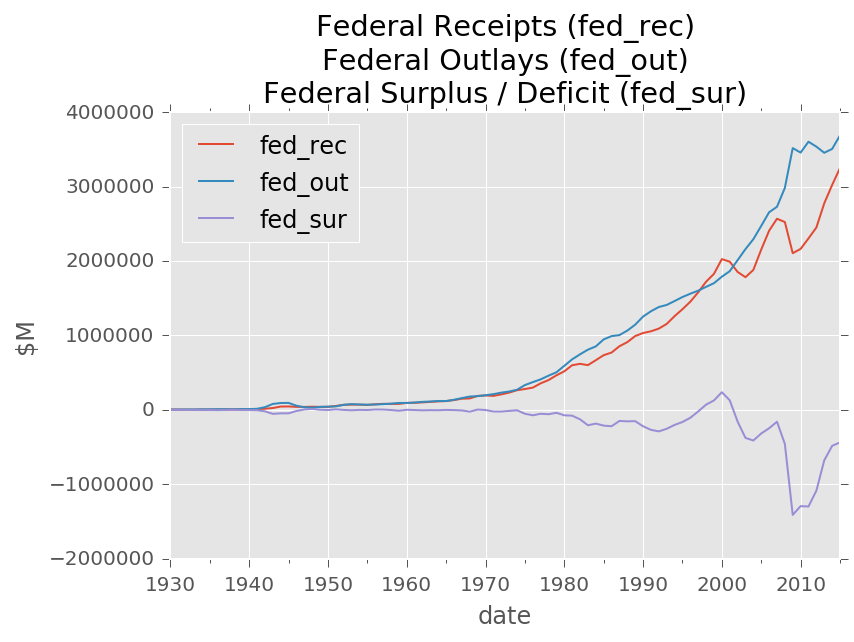

In [7]:
data[['fed_rec', 'fed_out', 'fed_sur']].plot()
plt.title('Federal Receipts (fed_rec)\nFederal Outlays (fed_out)\nFederal Surplus / Deficit (fed_sur)')
plt.ylabel('$M')
plt.show()

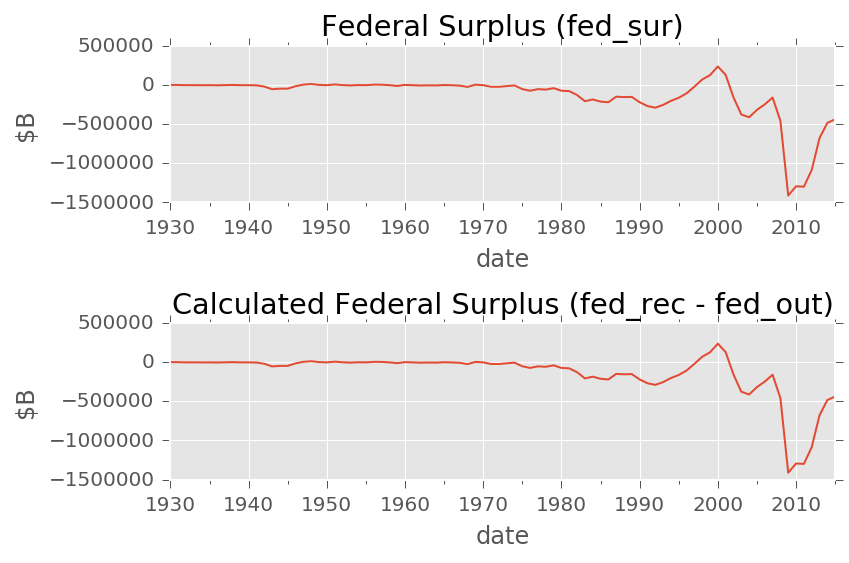

In [8]:
plt.subplot(2, 1, 1)
data['fed_sur'].plot()
plt.ylabel('$B')
plt.title('Federal Surplus (fed_sur)')
plt.subplot(2, 1, 2)
(data['fed_rec'] - data['fed_out']).plot()
plt.ylabel('$B')
plt.title('Calculated Federal Surplus (fed_rec - fed_out)')
plt.tight_layout()

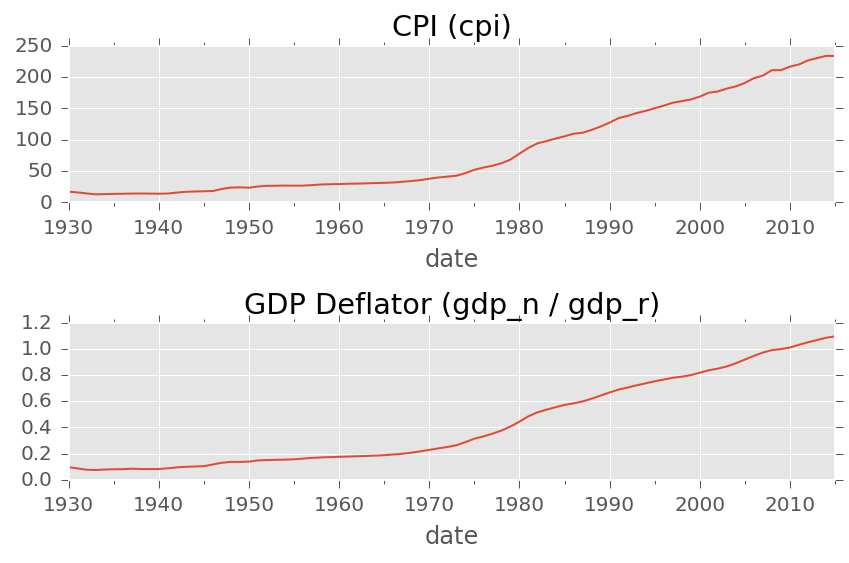

In [9]:
plt.subplot(2, 1, 1)
data['cpi'].plot()
plt.title('CPI (cpi)')
plt.subplot(2, 1, 2)
(data['gdp_n'] / data['gdp_r']).plot()
plt.title('GDP Deflator (gdp_n / gdp_r)')
plt.tight_layout()

In [10]:
def plot_line_with_background(line_data_name, background_binary_name, dataframe, title, ylabel):
    dataframe[line_data_name].plot(color=COLOR_ALT)
    if numpy.max(dataframe[line_data_name]) > 0:
        plt.bar(dataframe.index, dataframe[background_binary_name] * numpy.max(dataframe[line_data_name]), color=COLOR_DEM, align='center', alpha=0.2)
        plt.bar(dataframe.index, (1 - dataframe[background_binary_name]) * numpy.max(dataframe[line_data_name]), color=COLOR_REP, align='center', alpha=0.2)
    if numpy.min(dataframe[line_data_name]) < 0:
        plt.bar(dataframe.index, dataframe[background_binary_name] * numpy.min(dataframe[line_data_name]), color=COLOR_DEM, align='center', alpha=0.2)
        plt.bar(dataframe.index, (1 - dataframe[background_binary_name]) * numpy.min(dataframe[line_data_name]), color=COLOR_REP, align='center', alpha=0.2)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

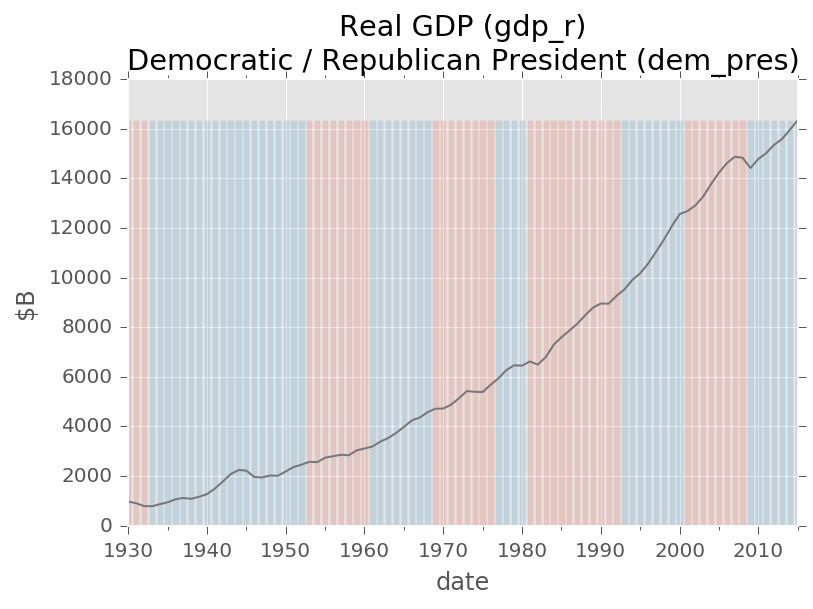

In [11]:
plot_line_with_background('gdp_r', 'dem_pres', data, 'Real GDP (gdp_r)\nDemocratic / Republican President (dem_pres)', '$B')

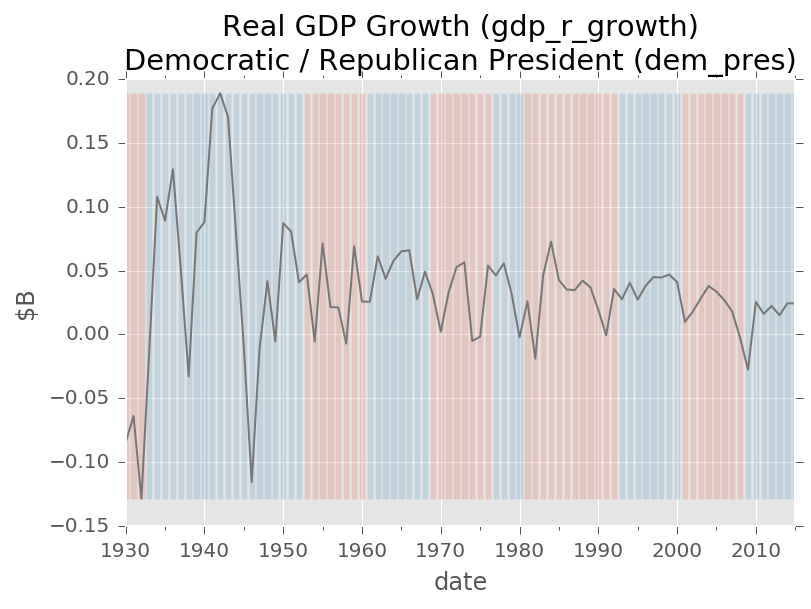

In [12]:
plot_line_with_background('gdp_r_growth', 'dem_pres', data, 
                          'Real GDP Growth (gdp_r_growth)\nDemocratic / Republican President (dem_pres)', '$B')

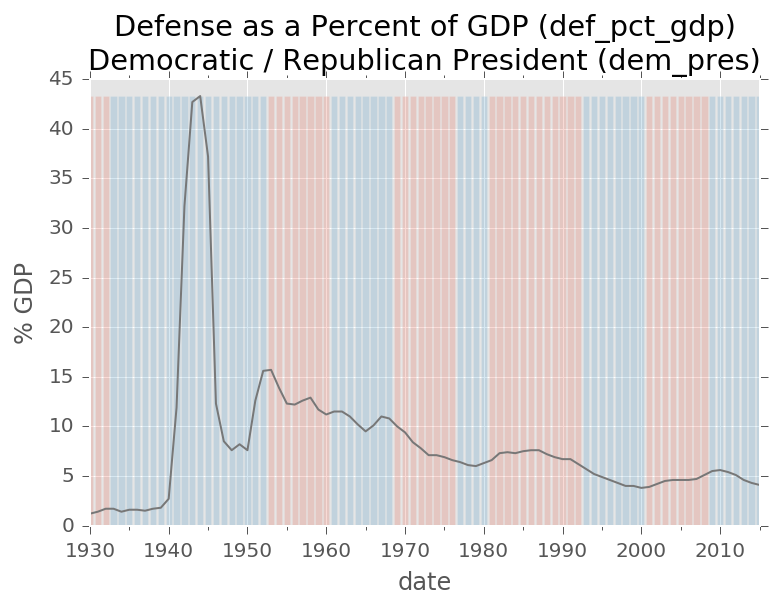

In [13]:
plot_line_with_background('def_pct_gdp', 'dem_pres', data, 
                          'Defense as a Percent of GDP (def_pct_gdp)\nDemocratic / Republican President (dem_pres)',
                          '% GDP')

In [14]:
data['gdp_r_growth_lag1'] = data['gdp_r'].pct_change().shift(1)
data['gdp_r_growth_lag2'] = data['gdp_r'].pct_change().shift(2)
data['gdp_r_growth_lag3'] = data['gdp_r'].pct_change().shift(3)

In [15]:
data['def_pct_gdp_lag1'] = data['def_pct_gdp'].pct_change().shift(1)
data['def_pct_gdp_lag2'] = data['def_pct_gdp'].pct_change().shift(2)

In [16]:
data['fed_sur_pct_gdp_growth'] = data['fed_sur_pct_gdp'].diff()

In [17]:
data['great_depression'] = 0
data['great_depression'][data.index < datetime.datetime(1938, 1, 1)] = 1
data['ww2'] = 0
data['ww2'][(data.index < datetime.datetime(1946, 1, 1)) & (data.index > datetime.datetime(1939, 1, 1))] = 1

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
data['dem_senate_pct'] = data['dem_senate'] / data['total_senate']
data['dem_house_pct'] = data['dem_house'] / data['total_house']

In [19]:
data

,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,...,gdp_r_growth_lag1,gdp_r_growth_lag2,gdp_r_growth_lag3,def_pct_gdp_lag1,def_pct_gdp_lag2,fed_sur_pct_gdp_growth,great_depression,ww2,dem_senate_pct,dem_house_pct
date,,,,,,,,,,,,,,,,,,,,,
1930-01-01,0,96,39,56,435,163,267,966.7,92.2,17.100,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0.406250,0.374713
1931-01-01,0,96,39,56,435,163,267,904.8,77.4,15.900,...,NaN,NaN,NaN,NaN,NaN,-13.973331,1,0,0.406250,0.374713
1932-01-01,0,96,47,48,435,217,217,788.2,59.5,14.300,...,-0.064032,NaN,NaN,0.166667,NaN,-39.997394,1,0,0.489583,0.498851
1933-01-01,1,96,47,48,435,217,217,778.3,57.2,12.900,...,-0.128868,-0.064032,NaN,0.214286,0.166667,0.476876,1,0,0.489583,0.498851
1934-01-01,1,96,59,36,435,313,117,862.2,66.8,13.200,...,-0.012560,-0.128868,-0.064032,0.000000,0.214286,-8.193124,1,0,0.614583,0.719540
1935-01-01,1,96,59,36,435,313,117,939.0,74.3,13.600,...,0.107799,-0.012560,-0.128868,-0.176471,0.000000,15.957197,1,0,0.614583,0.719540
1936-01-01,1,96,69,25,435,322,103,1060.5,84.9,13.800,...,0.089074,0.107799,-0.012560,0.142857,-0.176471,-12.969498,1,0,0.718750,0.740230
1937-01-01,1,96,69,25,435,322,103,1114.6,93.0,14.100,...,0.129393,0.089074,0.107799,0.000000,0.142857,27.114290,1,0,0.718750,0.740230
1938-01-01,1,96,75,17,435,333,89,1077.7,87.4,14.200,...,0.051014,0.129393,0.089074,-0.062500,0.000000,22.562339,0,0,0.781250,0.765517


In [20]:
data = data.dropna()
data

,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,...,gdp_r_growth_lag1,gdp_r_growth_lag2,gdp_r_growth_lag3,def_pct_gdp_lag1,def_pct_gdp_lag2,fed_sur_pct_gdp_growth,great_depression,ww2,dem_senate_pct,dem_house_pct
date,,,,,,,,,,,,,,,,,,,,,
1934-01-01,1,96,59,36,435,313,117,862.2,66.8,13.200,...,-0.012560,-0.128868,-0.064032,0.000000,0.214286,-8.193124,1,0,0.614583,0.719540
1935-01-01,1,96,59,36,435,313,117,939.0,74.3,13.600,...,0.107799,-0.012560,-0.128868,-0.176471,0.000000,15.957197,1,0,0.614583,0.719540
1936-01-01,1,96,69,25,435,322,103,1060.5,84.9,13.800,...,0.089074,0.107799,-0.012560,0.142857,-0.176471,-12.969498,1,0,0.718750,0.740230
1937-01-01,1,96,69,25,435,322,103,1114.6,93.0,14.100,...,0.129393,0.089074,0.107799,0.000000,0.142857,27.114290,1,0,0.718750,0.740230
1938-01-01,1,96,75,17,435,333,89,1077.7,87.4,14.200,...,0.051014,0.129393,0.089074,-0.062500,0.000000,22.562339,0,0,0.781250,0.765517
1939-01-01,1,96,75,17,435,333,89,1163.6,93.5,14.000,...,-0.033106,0.051014,0.129393,0.133333,-0.062500,-29.420196,0,0,0.781250,0.765517
1940-01-01,1,96,69,23,435,262,169,1266.1,102.9,13.900,...,0.079707,-0.033106,0.051014,0.058824,0.133333,2.061438,0,1,0.718750,0.602299
1941-01-01,1,96,69,23,435,262,169,1490.3,129.4,14.100,...,0.088089,0.079707,-0.033106,0.500000,0.058824,-9.806861,0,1,0.718750,0.602299
1942-01-01,1,96,66,28,435,267,162,1771.8,166.0,15.700,...,0.177079,0.088089,0.079707,3.407407,0.500000,-85.328122,0,1,0.687500,0.613793


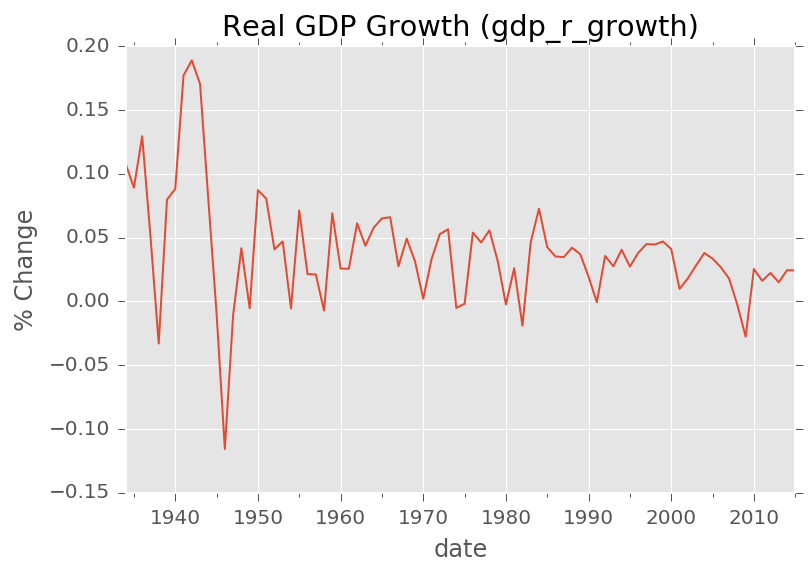

In [21]:
data['gdp_r_growth'].plot()
plt.title('Real GDP Growth (gdp_r_growth)')
plt.ylabel('% Change')
plt.show()

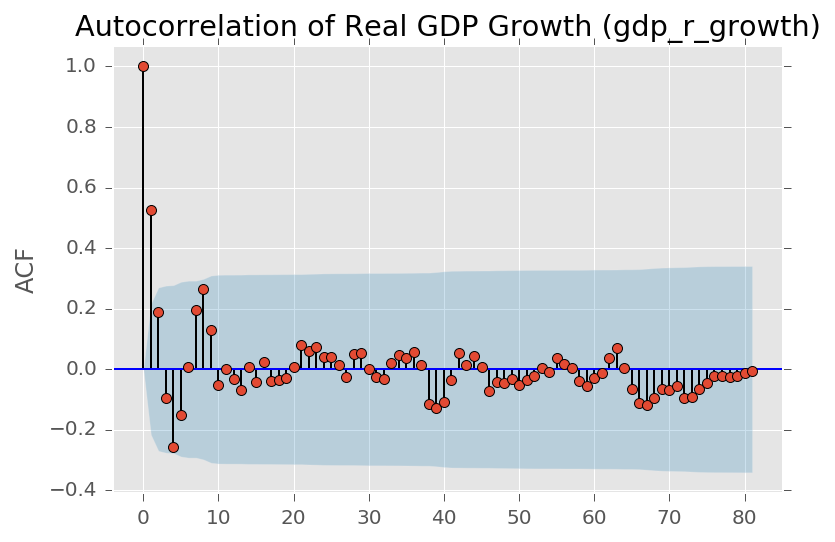

In [22]:
tsaplots.plot_acf(data['gdp_r_growth'])
plt.title('Autocorrelation of Real GDP Growth (gdp_r_growth)')
plt.ylabel('ACF')
plt.show()

In [23]:
model = sm.ols(formula='''
gdp_r_growth ~ dem_pres
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_r_growth   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.095
Date:                Mon, 20 Jun 2016   Prob (F-statistic):             0.0464
Time:                        00:28:54   Log-Likelihood:                 142.77
No. Observations:                  82   AIC:                            -281.5
Df Residuals:                      80   BIC:                            -276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0279      0.007      3.894      0.000       0.014       0.042
dem_pres       0.0193      0.010      2.024      0.046       0.000       0.038
==============================================================================
Omnibus:                       15.134   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               53.185
Skew:                           0.307   Prob(JB):                     2.83e-12
Kurtosis:                       6.897   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

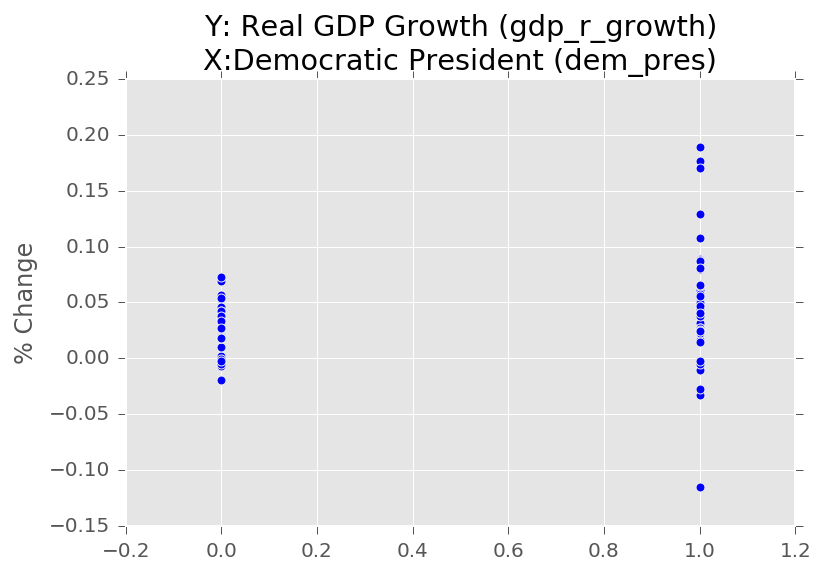

In [24]:
plt.scatter(y='gdp_r_growth', x='dem_pres', data=data)
plt.title('Y: Real GDP Growth (gdp_r_growth)\nX:Democratic President (dem_pres)')
plt.ylabel('% Change')
plt.show()

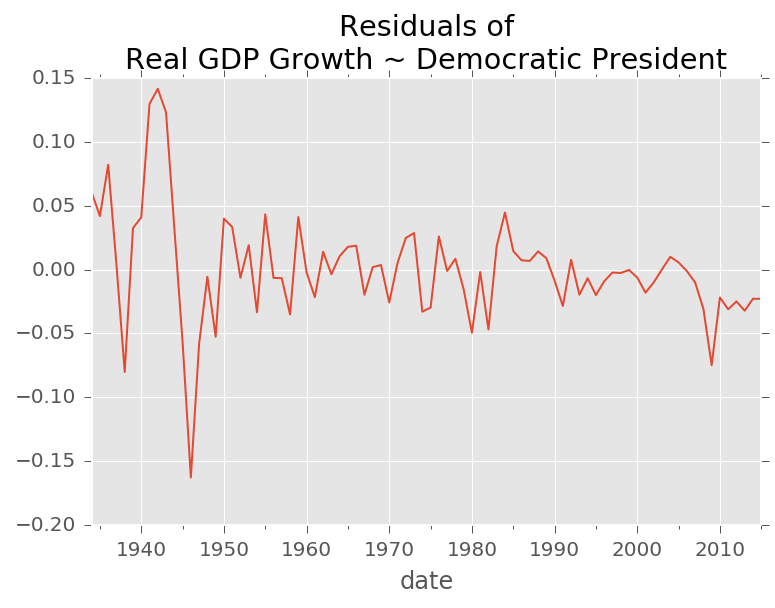

In [25]:
results.resid.plot()
plt.title('Residuals of\nReal GDP Growth ~ Democratic President')
plt.show()

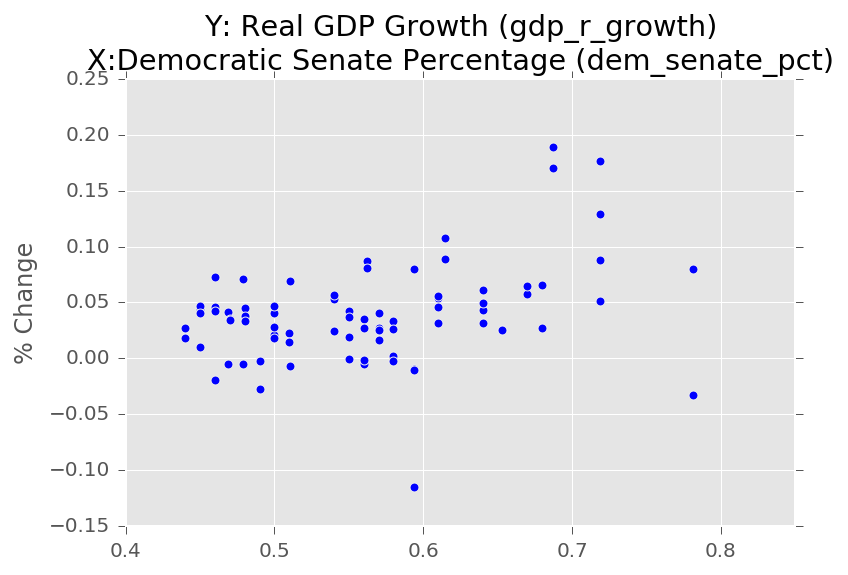

In [26]:
plt.scatter(y='gdp_r_growth', x='dem_senate_pct', data=data)
plt.title('Y: Real GDP Growth (gdp_r_growth)\nX:Democratic Senate Percentage (dem_senate_pct)')
plt.ylabel('% Change')
plt.show()

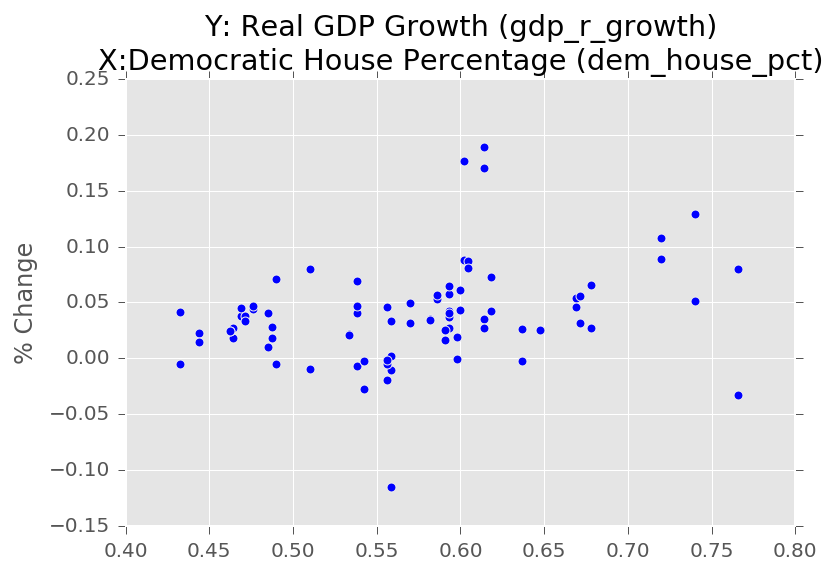

In [27]:
plt.scatter(y='gdp_r_growth', x='dem_house_pct', data=data)
plt.title('Y: Real GDP Growth (gdp_r_growth)\nX:Democratic House Percentage (dem_house_pct)')
plt.ylabel('% Change')
plt.show()

In [28]:
model = sm.ols(formula='''
gdp_r_growth ~ gdp_r_growth_lag1 + gdp_r_growth_lag2 + gdp_r_growth_lag3 + great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_r_growth   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     9.691
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           4.73e-09
Time:                        00:28:56   Log-Likelihood:                 170.39
No. Observations:                  82   AIC:                            -322.8
Df Residuals:                      73   BIC:                            -301.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0380      0.030     -1.286      0.202      -0.097       0.021
gdp_r_growth_lag1     0.2194      0.119      1.848      0.069      -0.017       0.456
gdp_r_growth_lag2    -0.0784      0.106     -0.740      0.461      -0.290       0.133
gdp_r_growth_lag3    -0.3090      0.096     -3.233      0.002      -0.499      -0.119
great_depression      0.0159      0.020      0.788      0.433      -0.024       0.056
ww2                   0.0834      0.020      4.169      0.000       0.044       0.123
dem_pres             -0.0035      0.009     -0.403      0.688      -0.021       0.014
dem_senate_pct        0.0459      0.086      0.532      0.596      -0.126       0.218
dem_house_pct         0.0900      0.083      1.083      0.282      -0.076       0.255
==============================================================================
Omnibus:                        4.444   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.660
Skew:                          -0.466   Prob(JB):                        0.160
Kurtosis:                       3.451   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

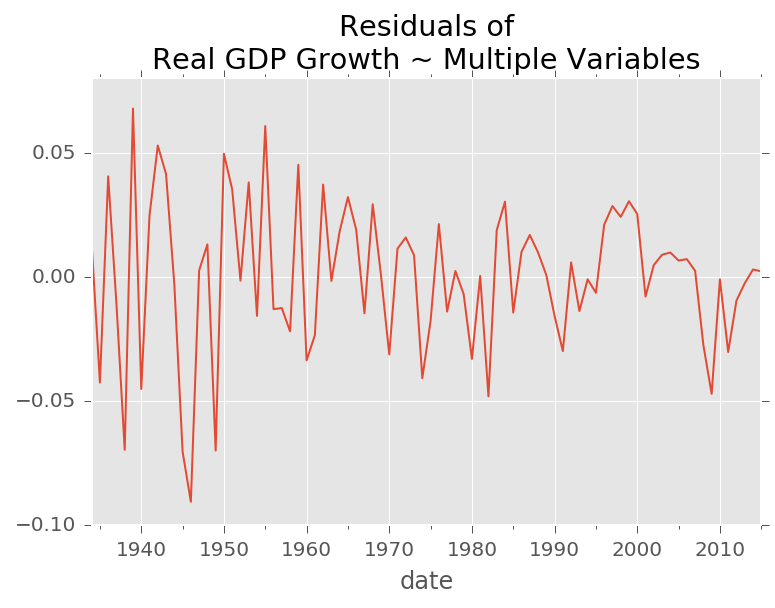

In [29]:
results.resid.plot()
plt.title('Residuals of\nReal GDP Growth ~ Multiple Variables')
plt.show()

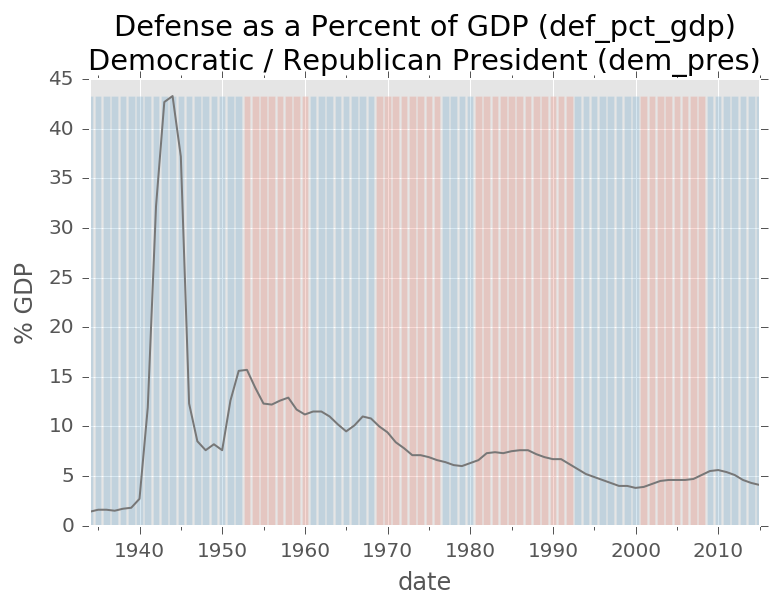

In [30]:
plot_line_with_background('def_pct_gdp', 'dem_pres', data, 
                          'Defense as a Percent of GDP (def_pct_gdp)\nDemocratic / Republican President (dem_pres)',
                          '% GDP')

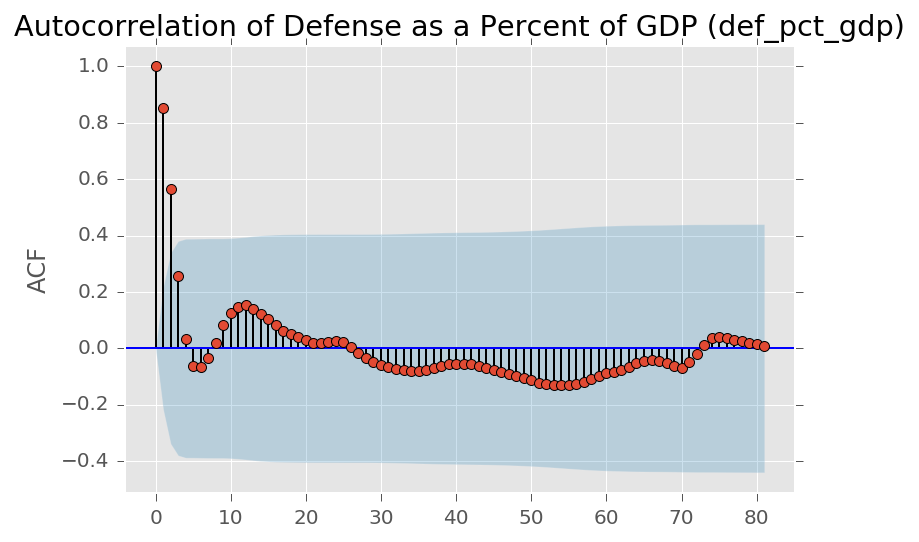

In [31]:
tsaplots.plot_acf(data['def_pct_gdp'])
plt.title('Autocorrelation of Defense as a Percent of GDP (def_pct_gdp)')
plt.ylabel('ACF')
plt.show()

In [32]:
model = sm.ols(formula='''
def_pct_gdp ~ dem_pres
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            def_pct_gdp   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7179
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.399
Time:                        00:28:57   Log-Likelihood:                -282.72
No. Observations:                  82   AIC:                             569.4
Df Residuals:                      80   BIC:                             574.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9722      1.283      6.213      0.000       5.418      10.526
dem_pres       1.4517      1.713      0.847      0.399      -1.958       4.861
==============================================================================
Omnibus:                       73.409   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.579
Skew:                           2.915   Prob(JB):                     5.22e-94
Kurtosis:                      12.578   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

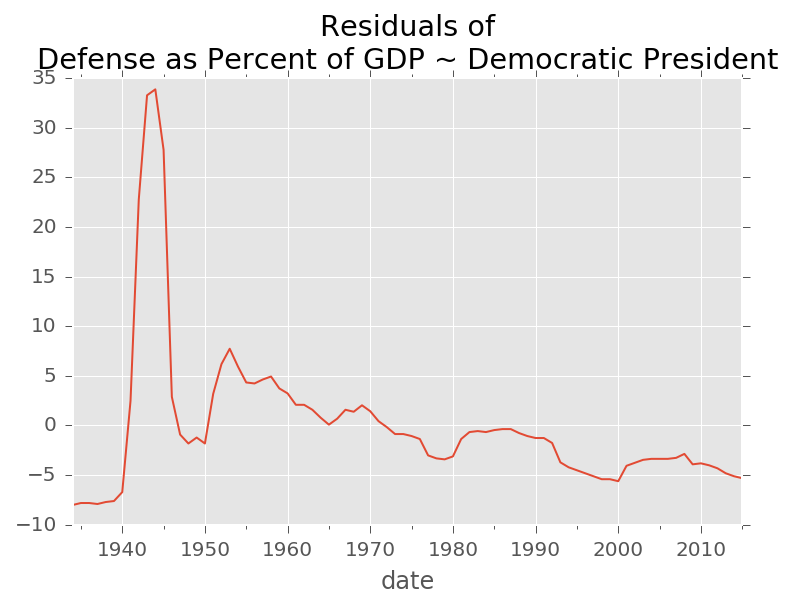

In [33]:
results.resid.plot()
plt.title('Residuals of\nDefense as Percent of GDP ~ Democratic President')
plt.show()

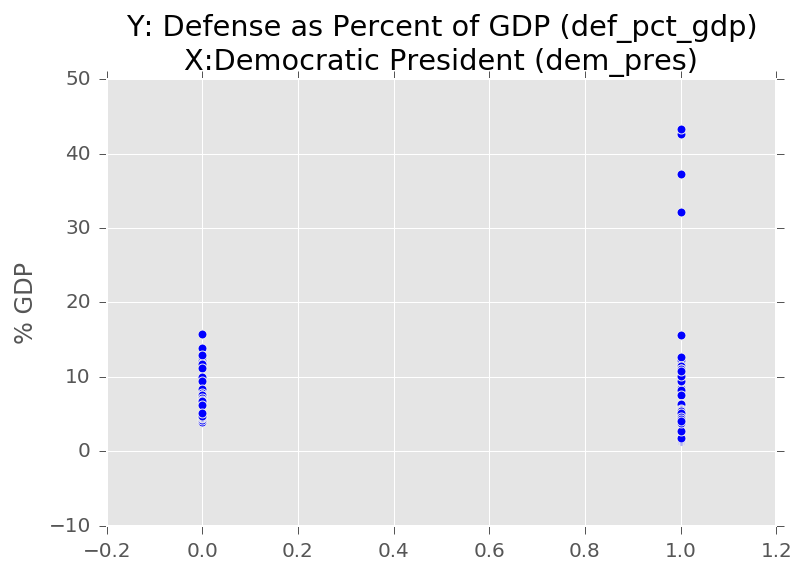

In [34]:
plt.scatter(y='def_pct_gdp', x='dem_pres', data=data)
plt.title('Y: Defense as Percent of GDP (def_pct_gdp)\nX:Democratic President (dem_pres)')
plt.ylabel('% GDP')
plt.show()

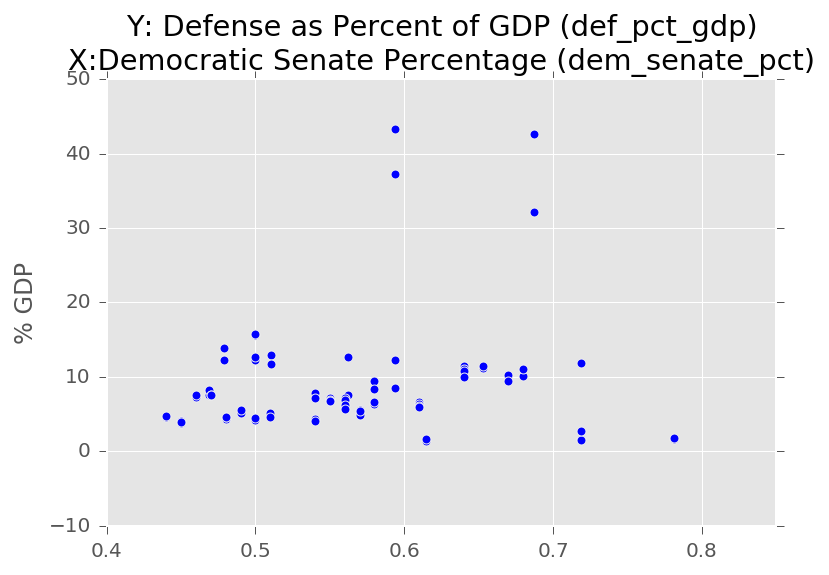

In [35]:
plt.scatter(y='def_pct_gdp', x='dem_senate_pct', data=data)
plt.title('Y: Defense as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_senate_pct)')
plt.ylabel('% GDP')
plt.show()

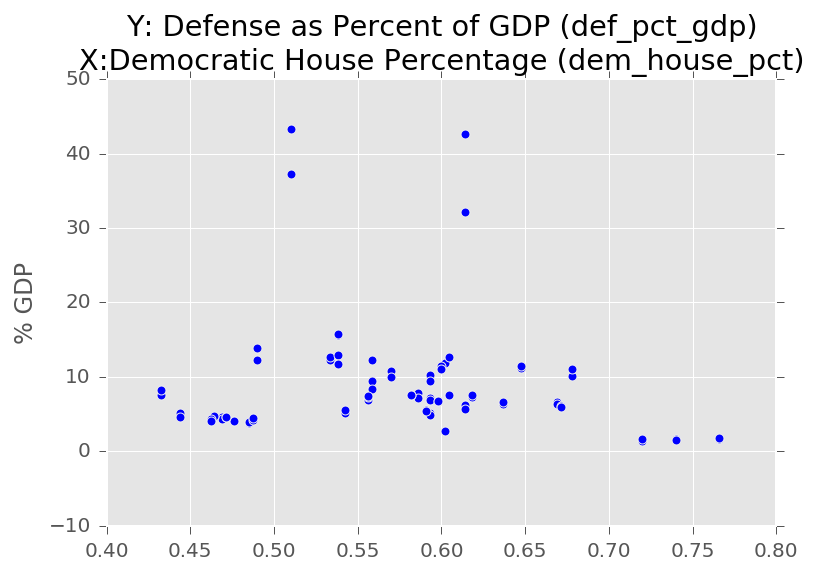

In [36]:
plt.scatter(y='def_pct_gdp', x='dem_house_pct', data=data)
plt.title('Y: Defense as Percent of GDP (def_pct_gdp)\nX:Democratic House Percentage (dem_house_pct)')
plt.ylabel('% GDP')
plt.show()

In [37]:
model = sm.ols(formula='''
def_pct_gdp ~ def_pct_gdp_lag1 + def_pct_gdp_lag2 + great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            def_pct_gdp   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     24.13
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           9.27e-17
Time:                        00:28:59   Log-Likelihood:                -234.35
No. Observations:                  82   AIC:                             484.7
Df Residuals:                      74   BIC:                             503.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.2103      4.070      2.509      0.014       2.102      18.319
def_pct_gdp_lag1     2.0192      1.447      1.396      0.167      -0.864       4.902
def_pct_gdp_lag2     7.7672      1.460      5.320      0.000       4.858      10.676
great_depression    -5.6714      2.616     -2.168      0.033     -10.884      -0.459
ww2                 10.4937      2.984      3.517      0.001       4.548      16.440
dem_pres            -0.1974      1.176     -0.168      0.867      -2.540       2.146
dem_senate_pct       2.4812     11.597      0.214      0.831     -20.626      25.588
dem_house_pct       -6.5826     11.484     -0.573      0.568     -29.464      16.299
==============================================================================
Omnibus:                       13.712   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               50.384
Skew:                           0.116   Prob(JB):                     1.15e-11
Kurtosis:                       6.833   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

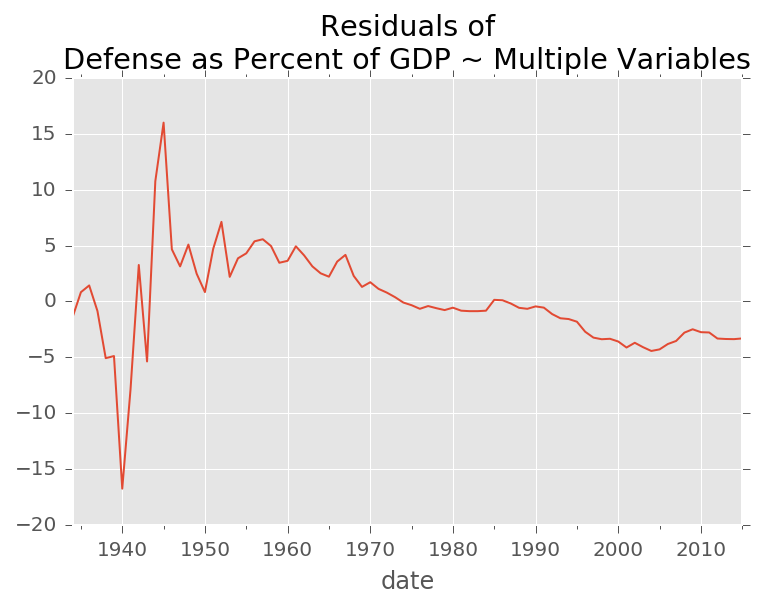

In [38]:
results.resid.plot()
plt.title('Residuals of\nDefense as Percent of GDP ~ Multiple Variables')
plt.show()

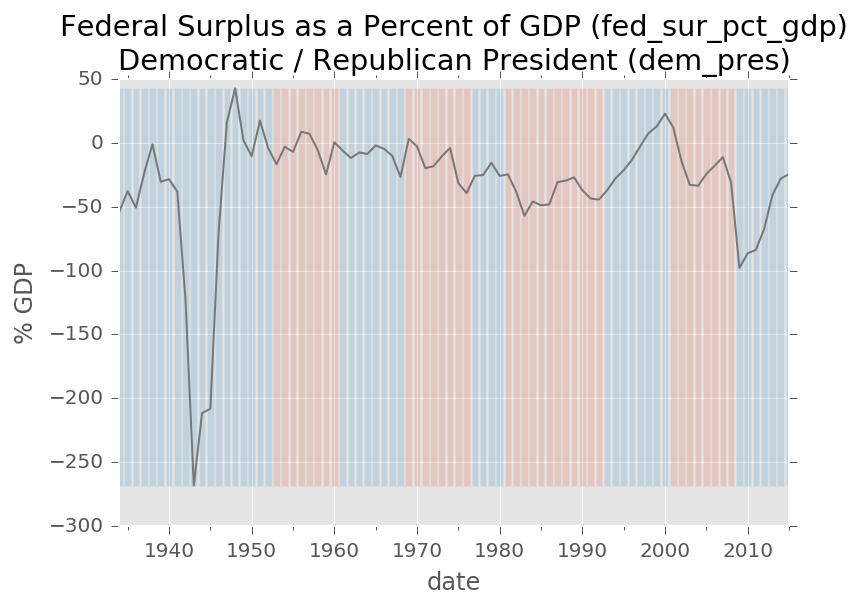

In [39]:
plot_line_with_background('fed_sur_pct_gdp', 'dem_pres', data, 
                          'Federal Surplus as a Percent of GDP (fed_sur_pct_gdp)\nDemocratic / Republican President (dem_pres)',
                          '% GDP')

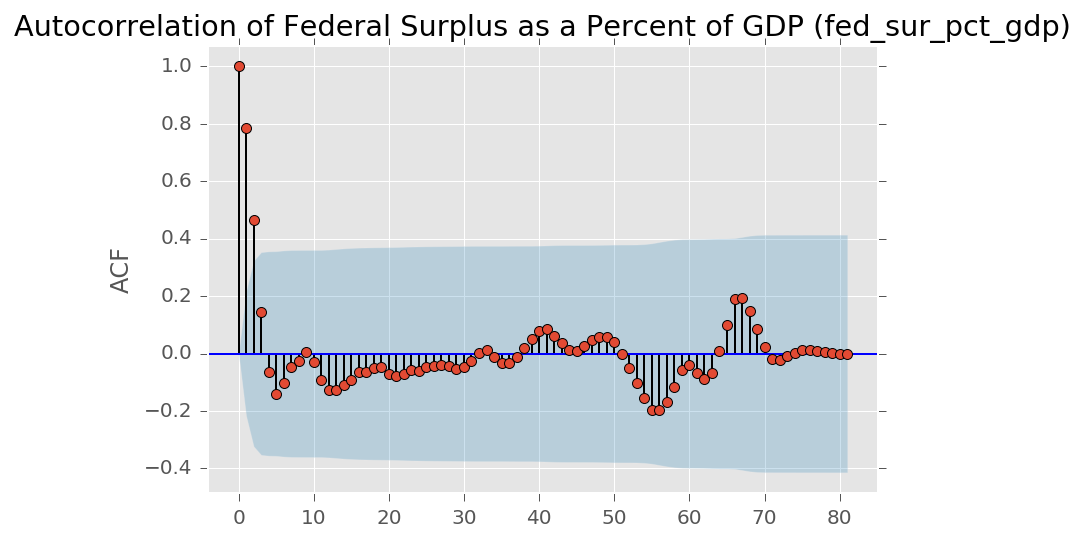

In [40]:
tsaplots.plot_acf(data['fed_sur_pct_gdp'])
plt.title('Autocorrelation of Federal Surplus as a Percent of GDP (fed_sur_pct_gdp)')
plt.ylabel('ACF')
plt.show()

In [41]:
model = sm.ols(formula='''
fed_sur_pct_gdp ~ dem_pres
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fed_sur_pct_gdp   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.263
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.136
Time:                        00:29:00   Log-Likelihood:                -431.39
No. Observations:                  82   AIC:                             866.8
Df Residuals:                      80   BIC:                             871.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.9831      7.866     -2.795      0.007     -37.637      -6.329
dem_pres     -15.7977     10.502     -1.504      0.136     -36.698       5.102
==============================================================================
Omnibus:                       68.292   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.391
Skew:                          -2.633   Prob(JB):                     2.29e-86
Kurtosis:                      12.365   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

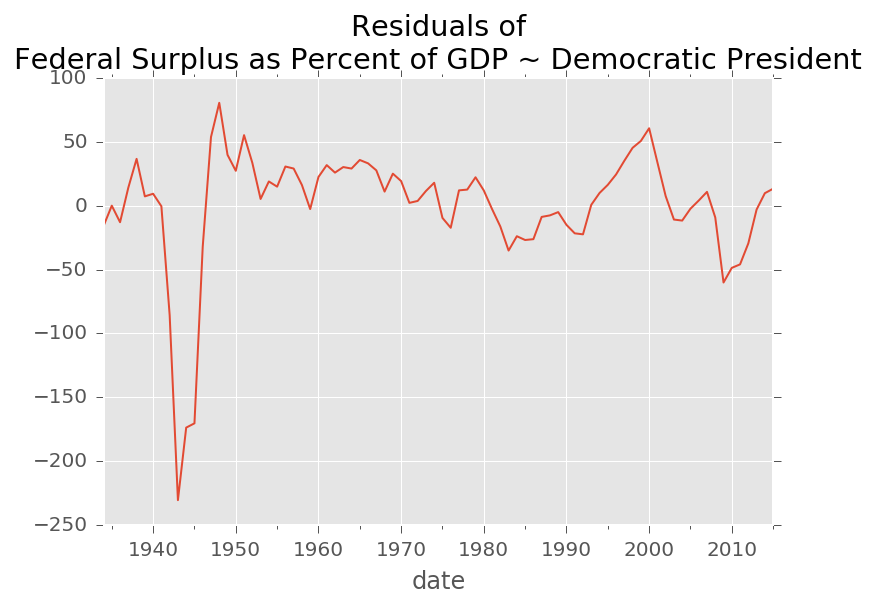

In [42]:
results.resid.plot()
plt.title('Residuals of\nFederal Surplus as Percent of GDP ~ Democratic President')
plt.show()

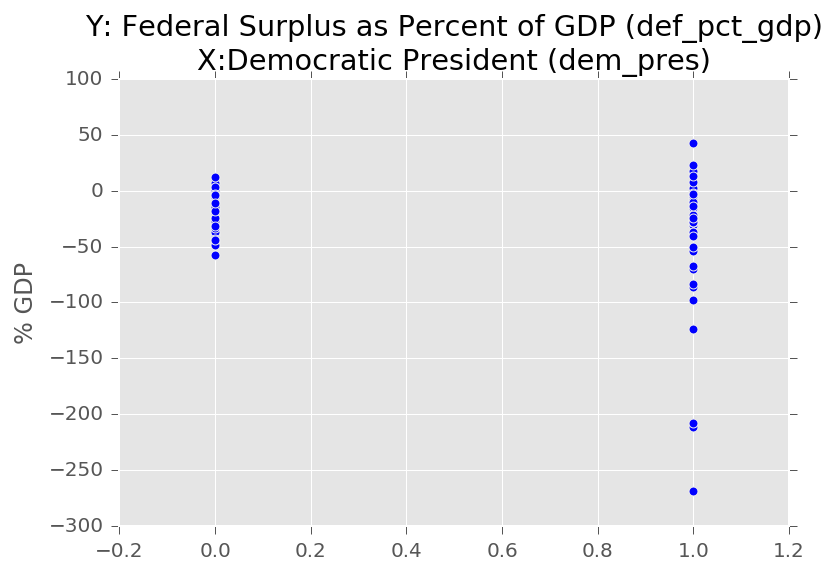

In [43]:
plt.scatter(y='fed_sur_pct_gdp', x='dem_pres', data=data)
plt.title('Y: Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic President (dem_pres)')
plt.ylabel('% GDP')
plt.show()

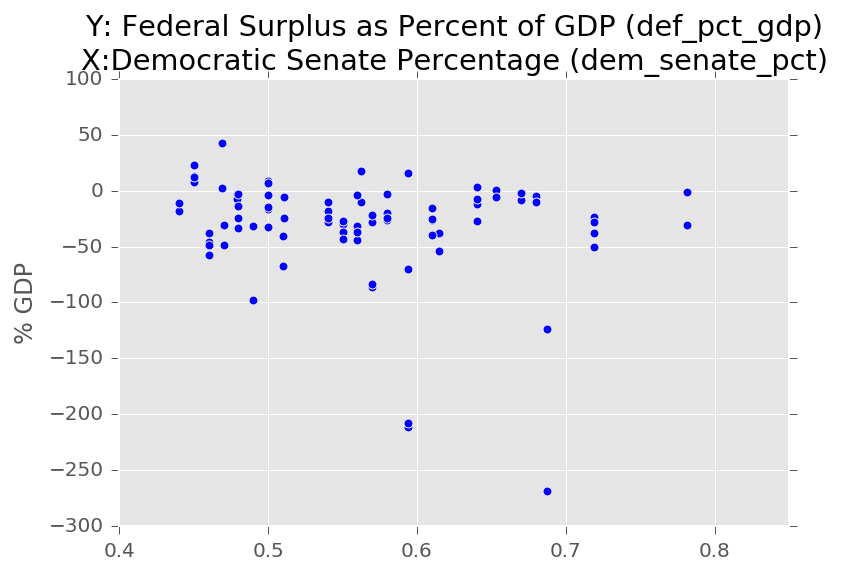

In [44]:
plt.scatter(y='fed_sur_pct_gdp', x='dem_senate_pct', data=data)
plt.title('Y: Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_senate_pct)')
plt.ylabel('% GDP')
plt.show()

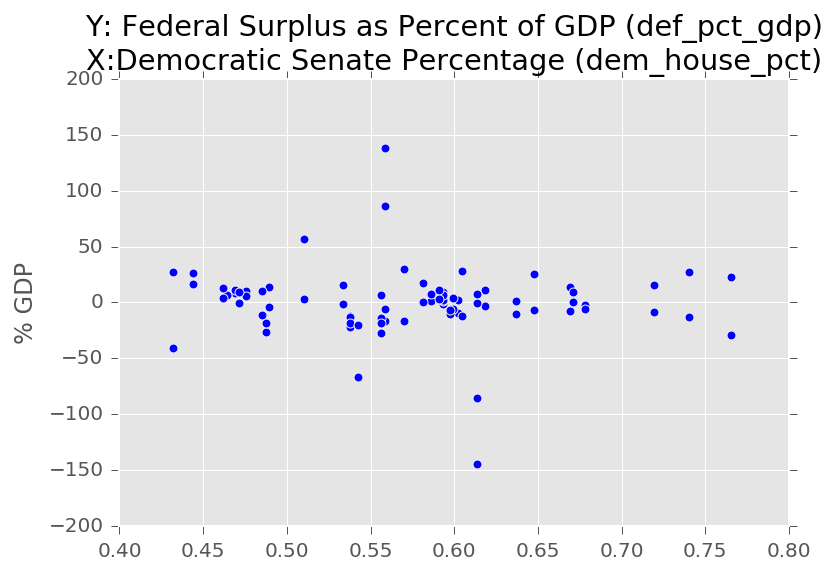

In [45]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_house_pct', data=data)
plt.title('Y: Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_house_pct)')
plt.ylabel('% GDP')
plt.show()

In [46]:
model = sm.ols(formula='''
fed_sur_pct_gdp ~ great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fed_sur_pct_gdp   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     16.11
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           8.36e-11
Time:                        00:29:02   Log-Likelihood:                -402.90
No. Observations:                  82   AIC:                             817.8
Df Residuals:                      76   BIC:                             832.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -25.2568     31.203     -0.809      0.421     -87.403      36.890
great_depression   -11.8680     20.128     -0.590      0.557     -51.957      28.221
ww2               -144.3432     16.981     -8.500      0.000    -178.163    -110.523
dem_pres            -5.6972      9.046     -0.630      0.531     -23.713      12.319
dem_senate_pct     196.5878     88.896      2.211      0.030      19.536     373.639
dem_house_pct     -177.6409     87.396     -2.033      0.046    -351.705      -3.577
==============================================================================
Omnibus:                       11.891   Durbin-Watson:                   0.853
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               37.346
Skew:                          -0.056   Prob(JB):                     7.77e-09
Kurtosis:                       6.304   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

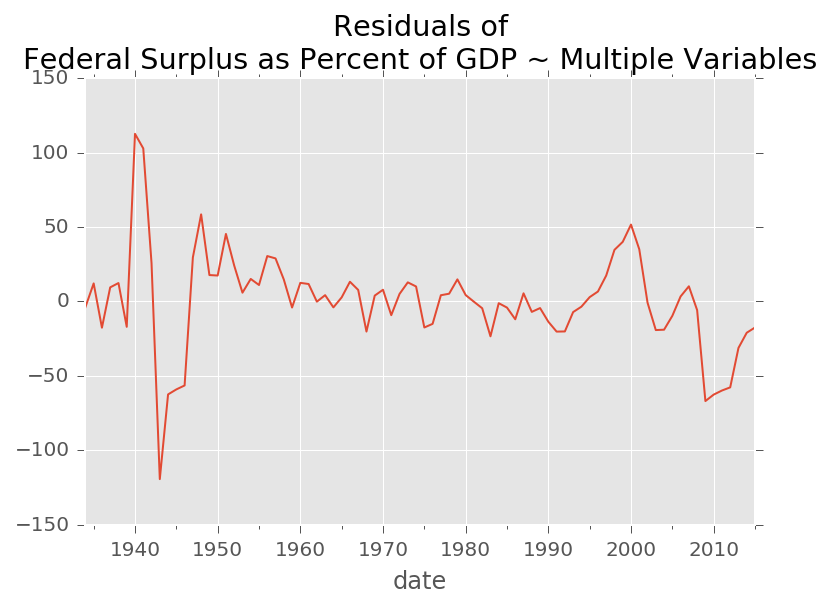

In [47]:
results.resid.plot()
plt.title('Residuals of\nFederal Surplus as Percent of GDP ~ Multiple Variables')
plt.show()

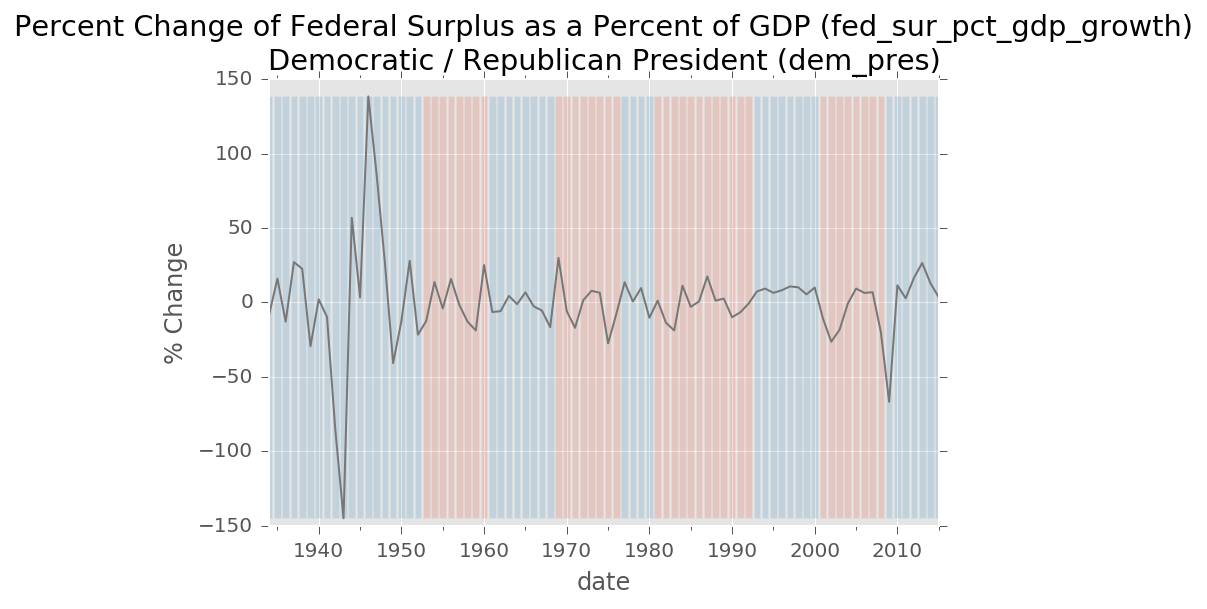

In [48]:
plot_line_with_background('fed_sur_pct_gdp_growth', 'dem_pres', data, 
                          'Percent Change of Federal Surplus as a Percent of GDP (fed_sur_pct_gdp_growth)\nDemocratic / Republican President (dem_pres)',
                          '% Change')

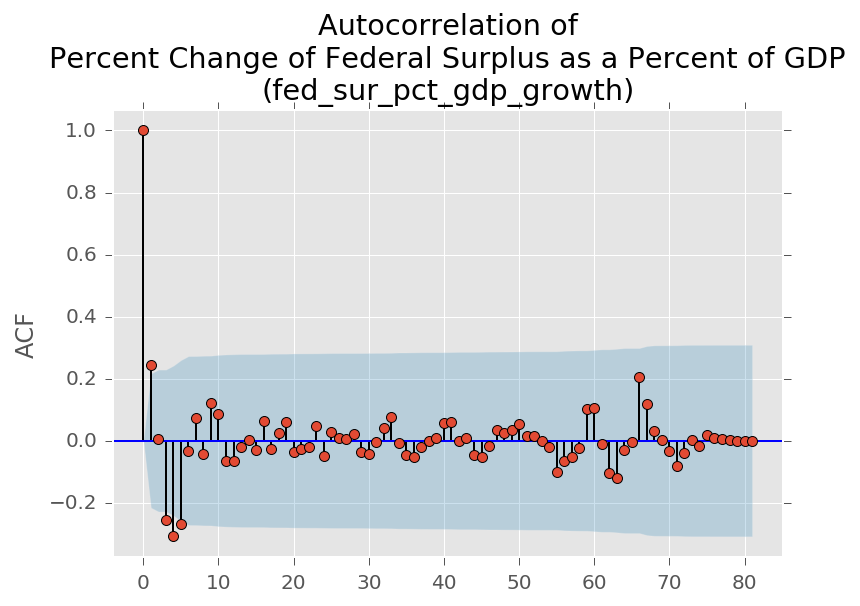

In [49]:
tsaplots.plot_acf(data['fed_sur_pct_gdp_growth'])
plt.title('Autocorrelation of\nPercent Change of Federal Surplus as a Percent of GDP\n(fed_sur_pct_gdp_growth)')
plt.ylabel('ACF')
plt.show()

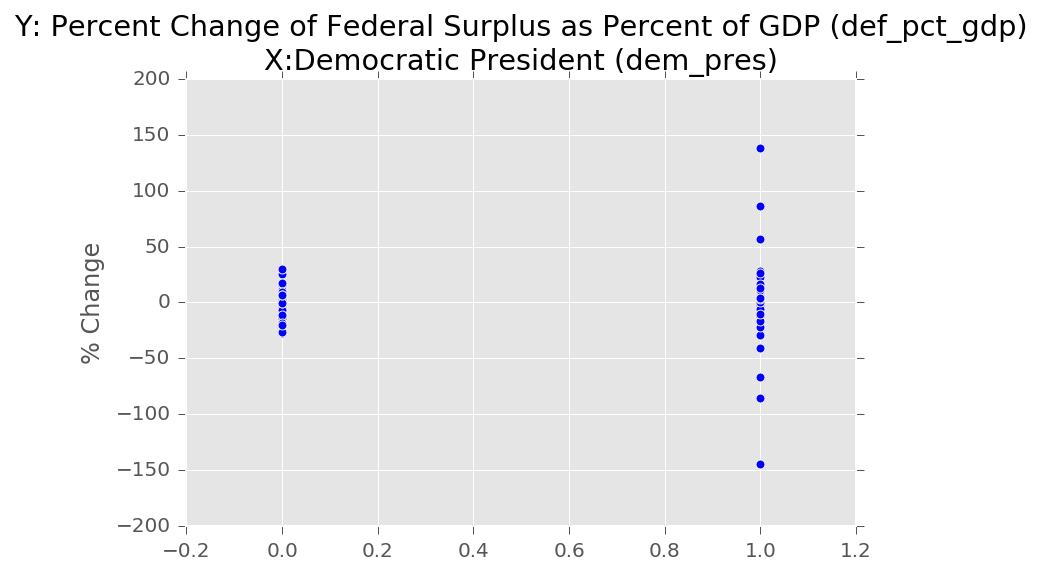

In [50]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_pres', data=data)
plt.title('Y: Percent Change of Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic President (dem_pres)')
plt.ylabel('% Change')
plt.show()

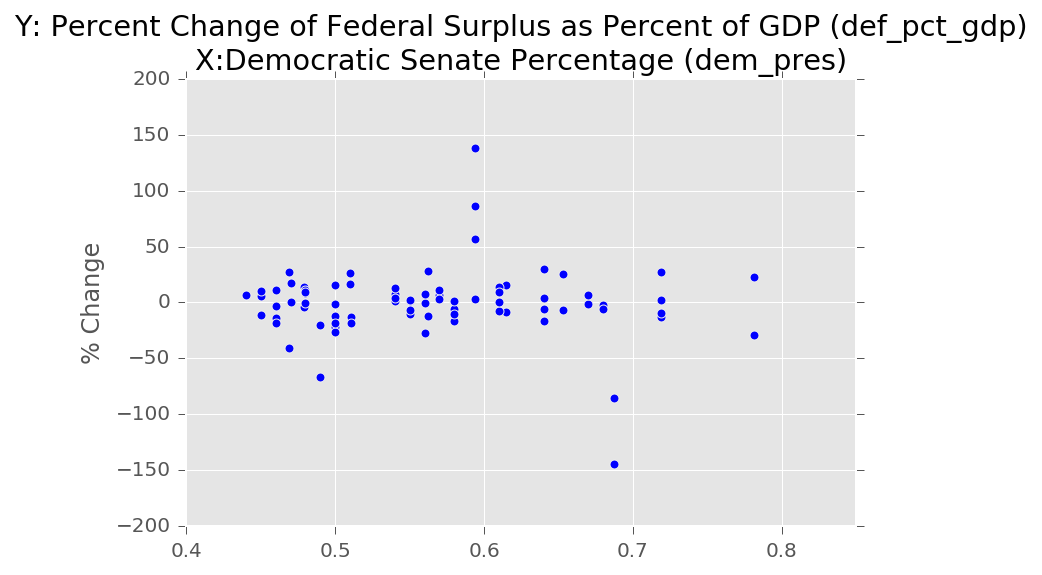

In [51]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_senate_pct', data=data)
plt.title('Y: Percent Change of Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_pres)')
plt.ylabel('% Change')
plt.show()

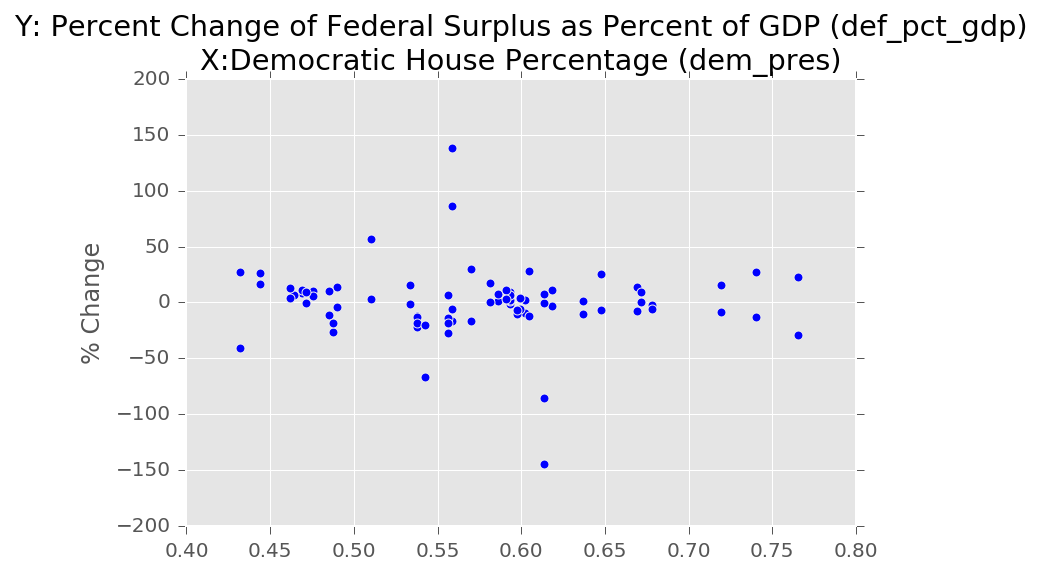

In [52]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_house_pct', data=data)
plt.title('Y: Percent Change of Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic House Percentage (dem_pres)')
plt.ylabel('% Change')
plt.show()

In [53]:
model = sm.ols(formula='''
fed_sur_pct_gdp_growth ~ great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     fed_sur_pct_gdp_growth   R-squared:                       0.114
Model:                                OLS   Adj. R-squared:                  0.056
Method:                     Least Squares   F-statistic:                     1.962
Date:                    Mon, 20 Jun 2016   Prob (F-statistic):             0.0939
Time:                            00:29:05   Log-Likelihood:                -392.86
No. Observations:                      82   AIC:                             797.7
Df Residuals:                          76   BIC:                             812.2
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.5760     27.605      0.564      0.574     -39.404      70.556
great_depression     7.5828     17.807      0.426      0.671     -27.883      43.049
ww2                -43.0652     15.023     -2.867      0.005     -72.985     -13.145
dem_pres             6.8452      8.003      0.855      0.395      -9.093      22.784
dem_senate_pct      73.2088     78.645      0.931      0.355     -83.427     229.844
dem_house_pct     -100.4714     77.318     -1.299      0.198    -254.464      53.521
==============================================================================
Omnibus:                       25.009   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.964
Skew:                           0.535   Prob(JB):                     3.03e-35
Kurtosis:                       9.736   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

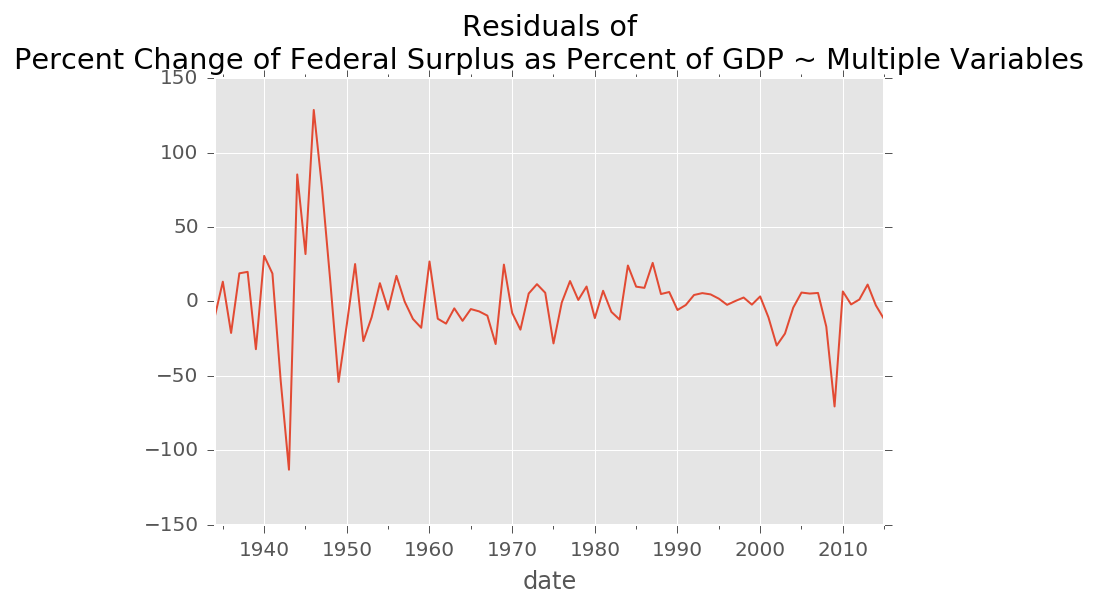

In [54]:
results.resid.plot()
plt.title('Residuals of\nPercent Change of Federal Surplus as Percent of GDP ~ Multiple Variables')
plt.show()